In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import colors 
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline

In [ ]:
df = pd.read_csv("train.csv") 
df.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

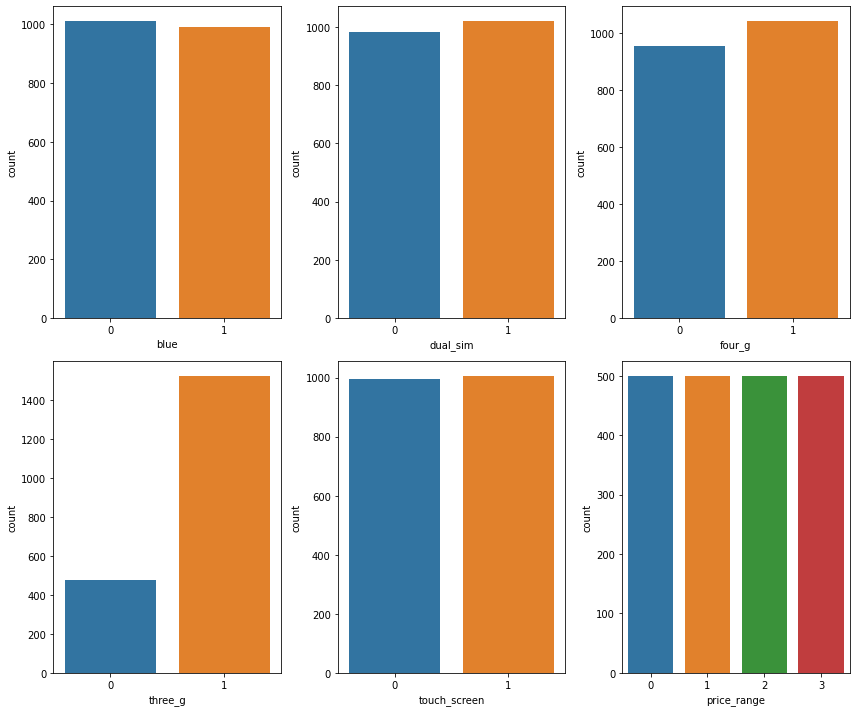

In [ ]:
plt.figure(figsize=(12,10))
col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sns.countplot(x = i,data =df)
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

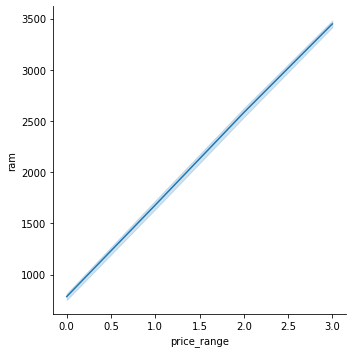

In [ ]:
sns.relplot(x = 'price_range',y = 'ram',data = df,kind = 'line')

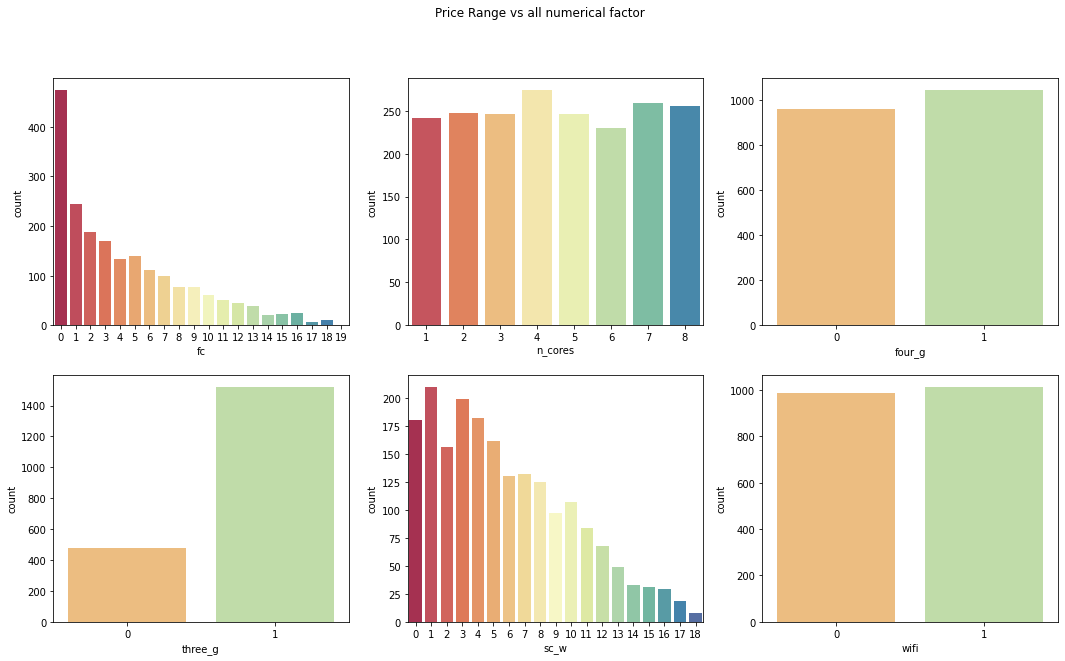

In [ ]:
fig=plt.figure(figsize=(18,10))
fig.suptitle('Price Range vs all numerical factor')
col = ['fc','n_cores','four_g','three_g','sc_w','wifi']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sns.countplot(x = i,data =df,palette="Spectral")
        plt.xlabel(i)
    c += 1
plt.show()

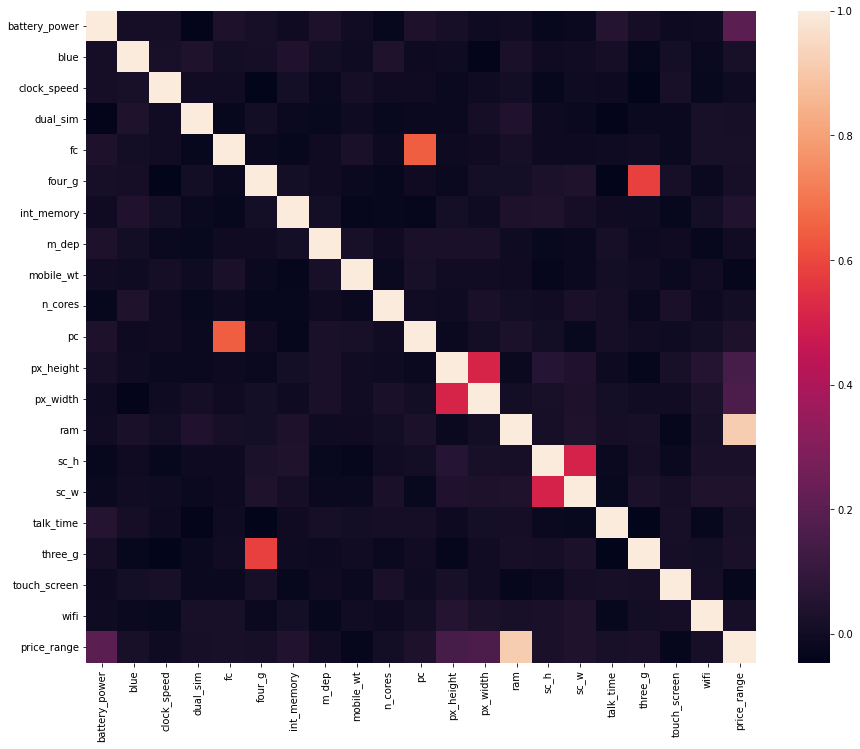

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

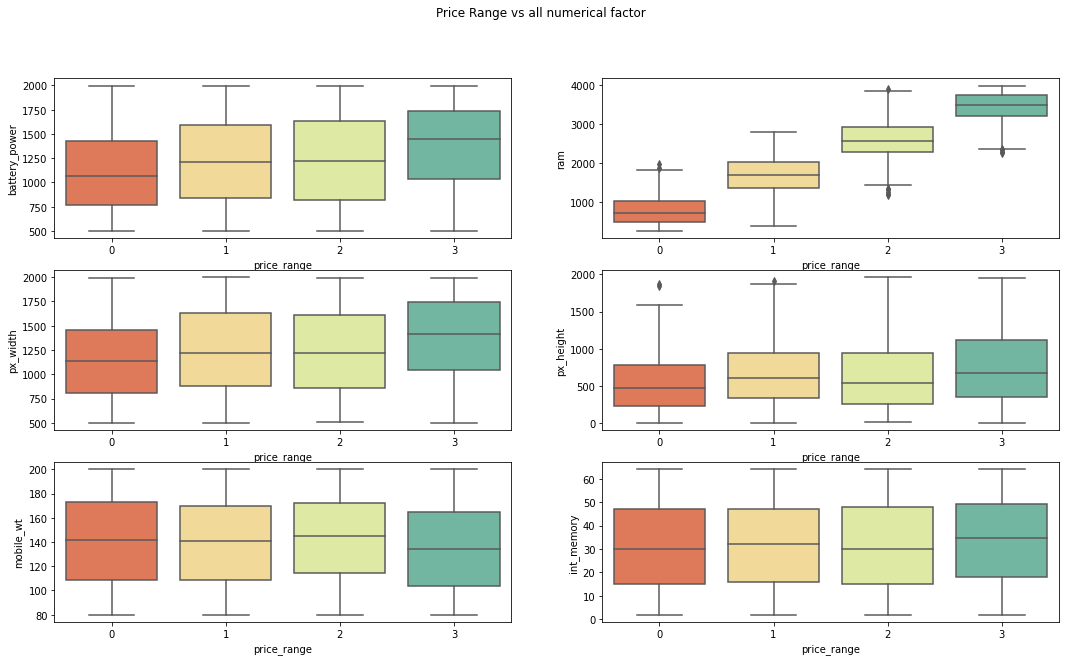

In [ ]:
fig=plt.figure(figsize=(18,10))
fig.suptitle('Price Range vs all numerical factor')
col = ['battery_power','ram','px_width','px_height','mobile_wt','int_memory']
c = 1
for i in col:
    if c < 7:
        plt.subplot(3,2,c)
        sns.boxplot(x ='price_range',y=i,data =df,palette="Spectral")
        plt.xlabel("price_range")
        plt.ylabel(i)
    c += 1
plt.show()

In [ ]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

**1. Linear Regression**

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
acclrm=lrm.score(X_test,y_test)
print("Accuracy score =",acclrm)

Accuracy score = 0.9190369530612716


**2. Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('Accuracy score = ',lra)

confusion matrix:
 [[131  37   1   0]
 [ 33  82  36  11]
 [  1  34  85  42]
 [  0   3  41 123]]
Accuracy score =  0.6378787878787879


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**3.SVM**

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[164   5   0   0]
 [  1 160   1   0]
 [  0   3 154   5]
 [  0   0   1 166]]


In [ ]:
print("Accuracy score = ",acc2)

Accuracy score =  0.9757575757575757


**4. DT**

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('Accuracy score = ',dta)

confusion matrix:
 [[144  25   0   0]
 [ 11 139  12   0]
 [  0  24 118  20]
 [  0   0  19 148]]
Accuracy score =  0.8318181818181818


# Comparing Models

In [ ]:
df = pd.DataFrame({'models' : ['Linear Regression','Logistic Regression','SVM','Decision Tree'], 'Accuracy Score':[acclrm,lra,acc2,dta]})

In [ ]:
df.sort_values(by = 'Accuracy Score', ascending = False)

,models,Accuracy Score
2,SVM,0.975758
0,Linear Regression,0.919037
3,Decision Tree,0.831818
1,Logistic Regression,0.637879


#Using Decision tree Predict value for test dataset

In [ ]:
Testdf=pd.read_csv("test.csv")

In [ ]:
X_test=Testdf.drop('id',axis=1)
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
y_pred=dt.predict(X_test)
print("Prediction values",y_pred)


Prediction values [3 3 2 3 1 3 3 0 3 0 3 3 0 0 2 1 2 1 3 2 0 3 1 1 3 0 2 0 3 0 2 0 3 0 1 0 3
 1 2 2 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 1 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 1 1 1 2 1 0 0 3 1 2 1 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 2 1 3 2 3 2 0 2 1 1 3 0 1 0 3 2 1 3 1 2 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 2 0 0 1 2 0 0 0 1 2
 3 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 3 2 3 2 1 1 1 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 1 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 0 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 2 1 3 2 0 3 0 0 2 1 0 3 3 3 2 2 1 3 3 2 3 2 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 3 3 1
 2 3 2 3 1 3 3 1 2 3 3 3 1 3 0 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 3 2 0 1 0 0 3 3 1 2 1 1 2 1 2 3 1 1 2 2 1 2 0 1 0 0 3 2 0 0 1 0 0 1
 1 0 1 0 2 2 3 2 3 0 2 0 3 0 1 1 1 1 0 2 2 3 3 1 3 1 3 2 3 2 0 2 2 2 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 3 1 1 1 3 2 3 0 3 0 2 3 3 3 0 2 0 2 3 0 2 1 0 0 1
 1 1 3 